In [10]:
import pandas as pd
import matplotlib.pyplot as plt
test_start = '2023-02-31'
BAL_pred =  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
YSL_pred =  [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
GIV_pred =  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
ALL_pred =  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

df = pd.read_csv(f'BAL.csv', index_col='date')

df_test = df[df.index > test_start]
test_index = df_test.index

df_BAL_pred = pd.DataFrame(data=BAL_pred, index=test_index, columns = ['pred'])
df_GIV_pred = pd.DataFrame(data=GIV_pred, index=test_index, columns = ['pred'])
df_YSL_pred = pd.DataFrame(data=YSL_pred, index=test_index, columns = ['pred'])
df_ALL_pred = pd.DataFrame(data=ALL_pred, index=test_index, columns = ['pred'])

perimeter = [['BAL',df_BAL_pred], ['GIV',df_GIV_pred], ['YSL',df_YSL_pred], ['ALL',df_ALL_pred]]

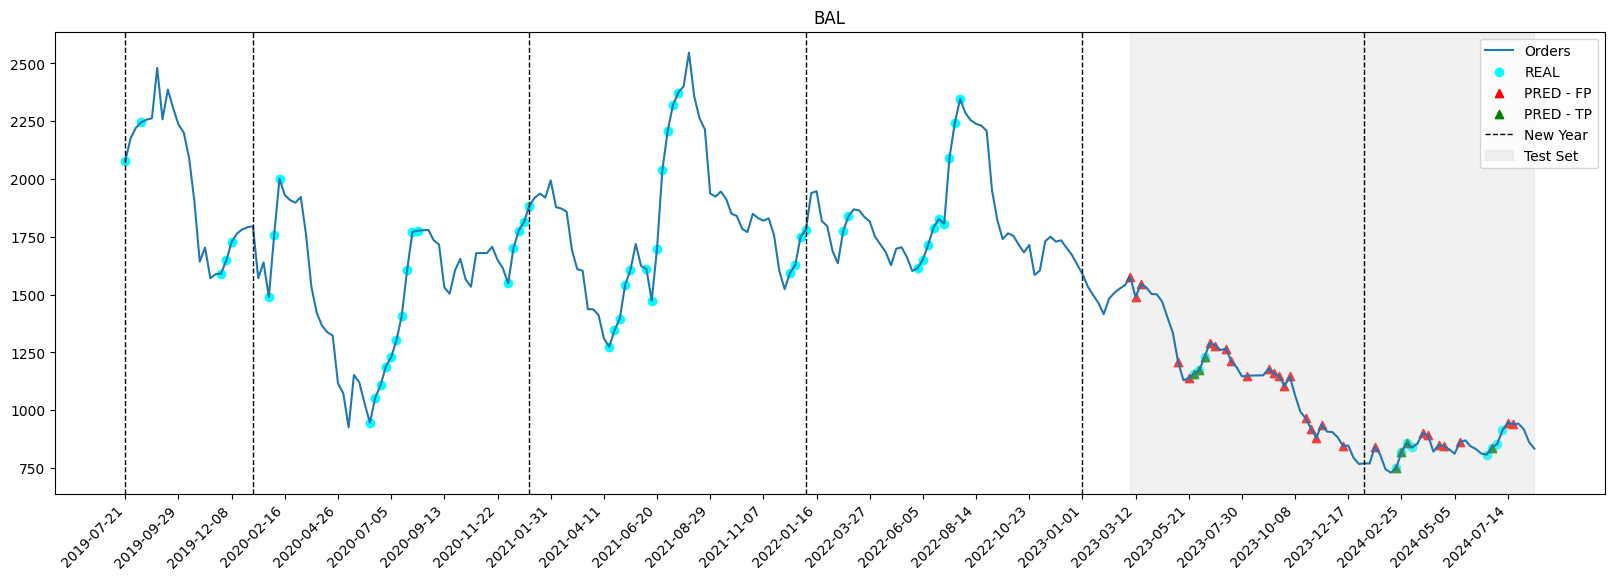

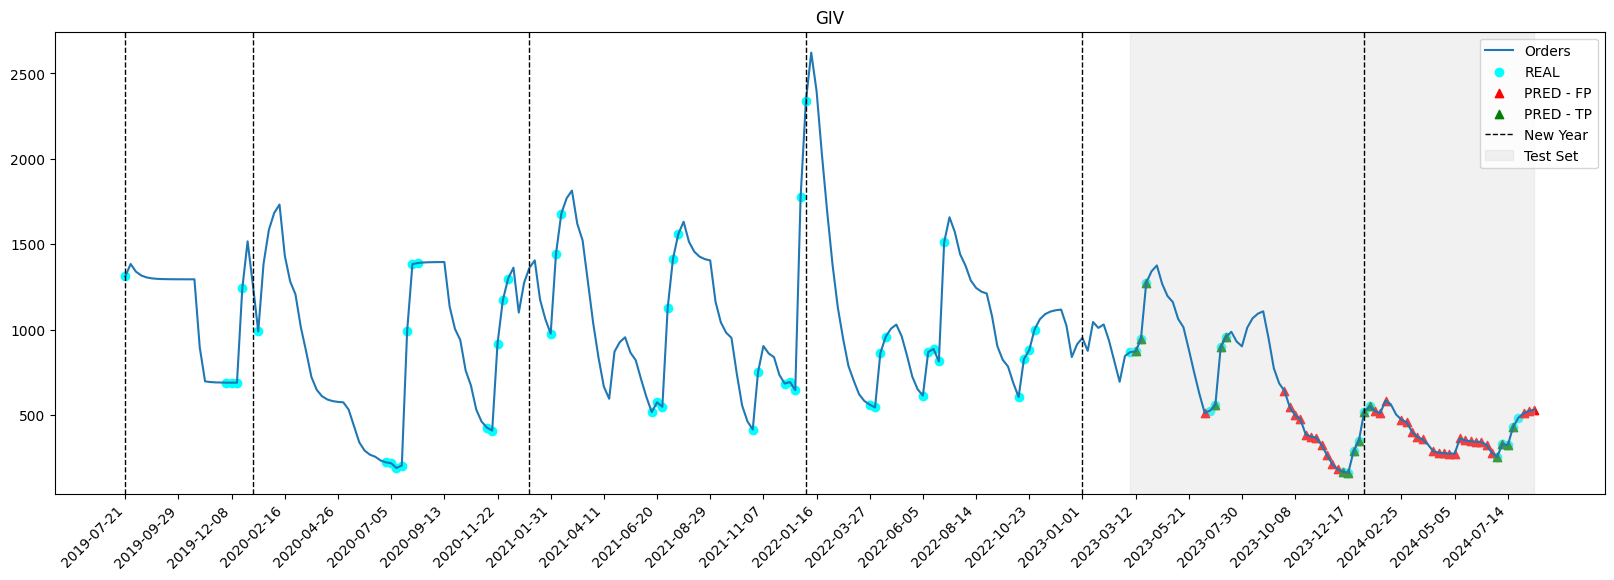

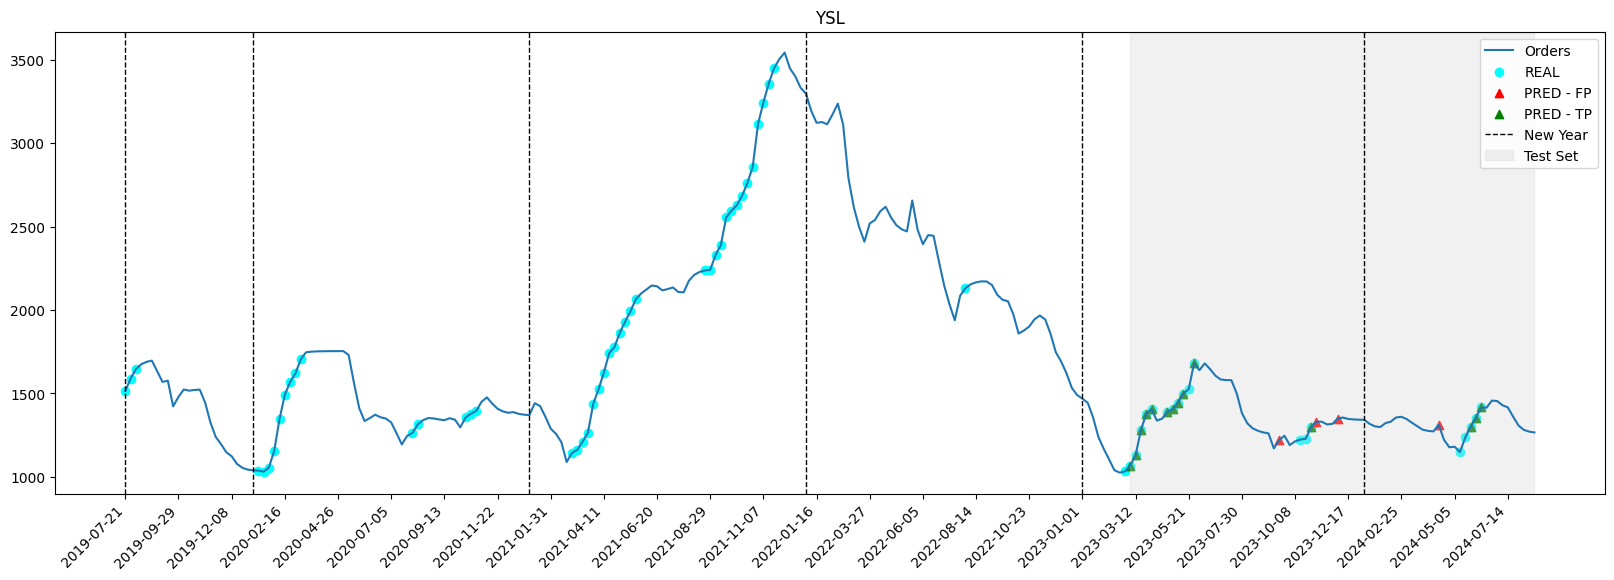

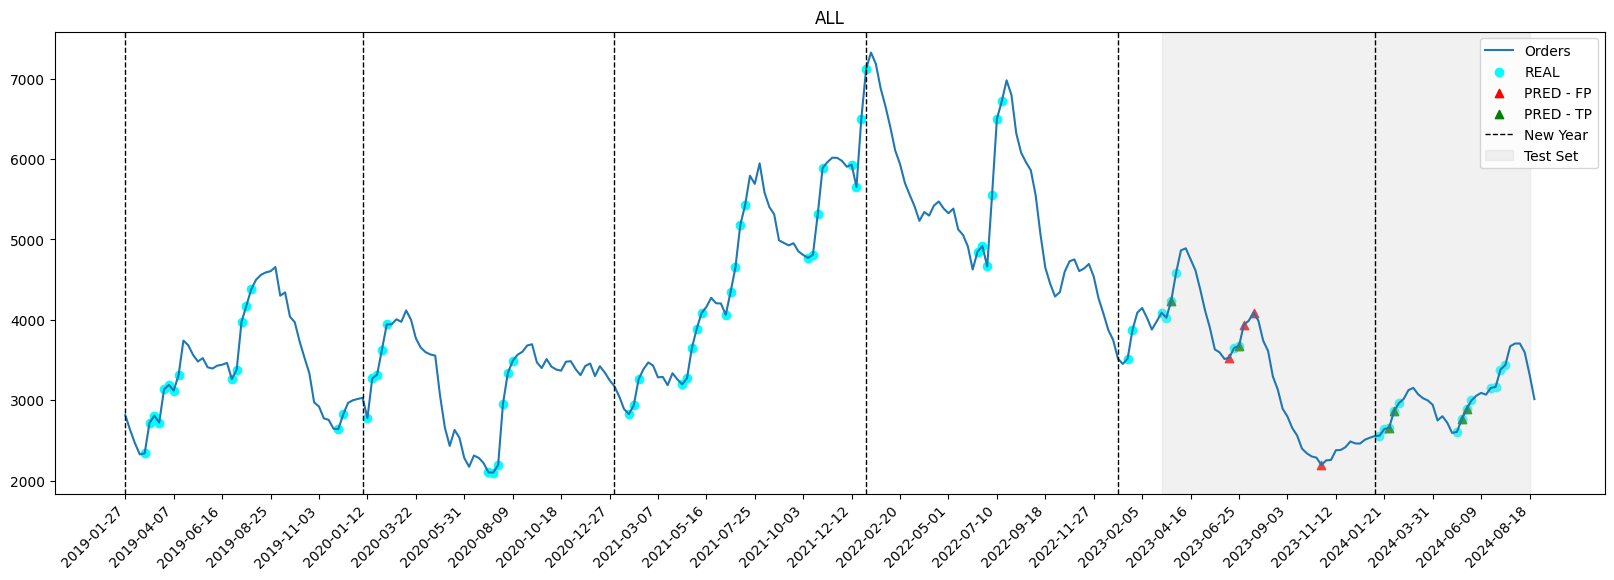

In [19]:
for brand in perimeter:
    df = pd.read_csv(f'{brand[0]}.csv', index_col='date')
    df = df.join(brand[1], how='left')
    df['date'] = df.index
    df['year'] = pd.to_datetime(df['date']).apply(lambda x : x.year)

    plt.figure(figsize=(20,6))
    plt.axvspan(test_index[0], test_index[-1], color='lightgrey', alpha=0.3, label='Test Set')
    plt.scatter(df.index[df['month_variation'] == 1], df['qty-0'][df['month_variation'] == 1], color='cyan', label='REAL', marker='o', alpha=1)
    plt.scatter(df.index[(df['pred'] == 1) & (df['month_variation'] != 1)], df['qty-0'][(df['pred'] == 1) & (df['month_variation'] != 1)], color='red', label='PRED - FP', marker='^', alpha=1)
    plt.scatter(df.index[(df['pred'] == 1) & (df['month_variation'] == 1)], df['qty-0'][(df['pred'] == 1) & (df['month_variation'] == 1)], color='green', label='PRED - TP', marker='^', alpha=1)

    for year in df['year'].unique():
        plt.axvline(df[df['year'] == year].index[0], color='black', linestyle='--', lw=1, label='New Year' if year == df['year'].min() else "")

    plt.axvspan(test_index[0], test_index[-1], color='lightgrey', alpha=0.3, label='Test Set')

    xticks = df.index[::10]  # Show every nth label
    plt.xticks(xticks, rotation=45, ha='right')

    plt.xticks(rotation=45, ha='right')

    plt.title(brand[0])

    plt.legend()
    plt.show()

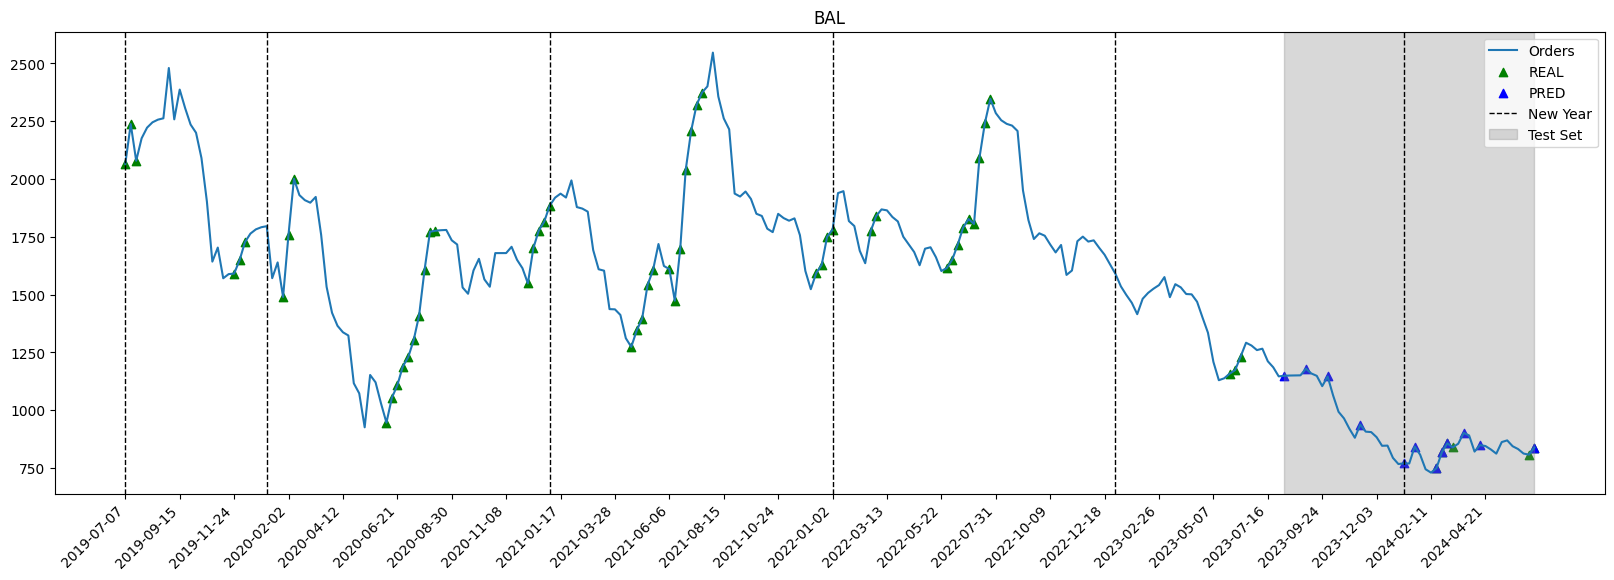

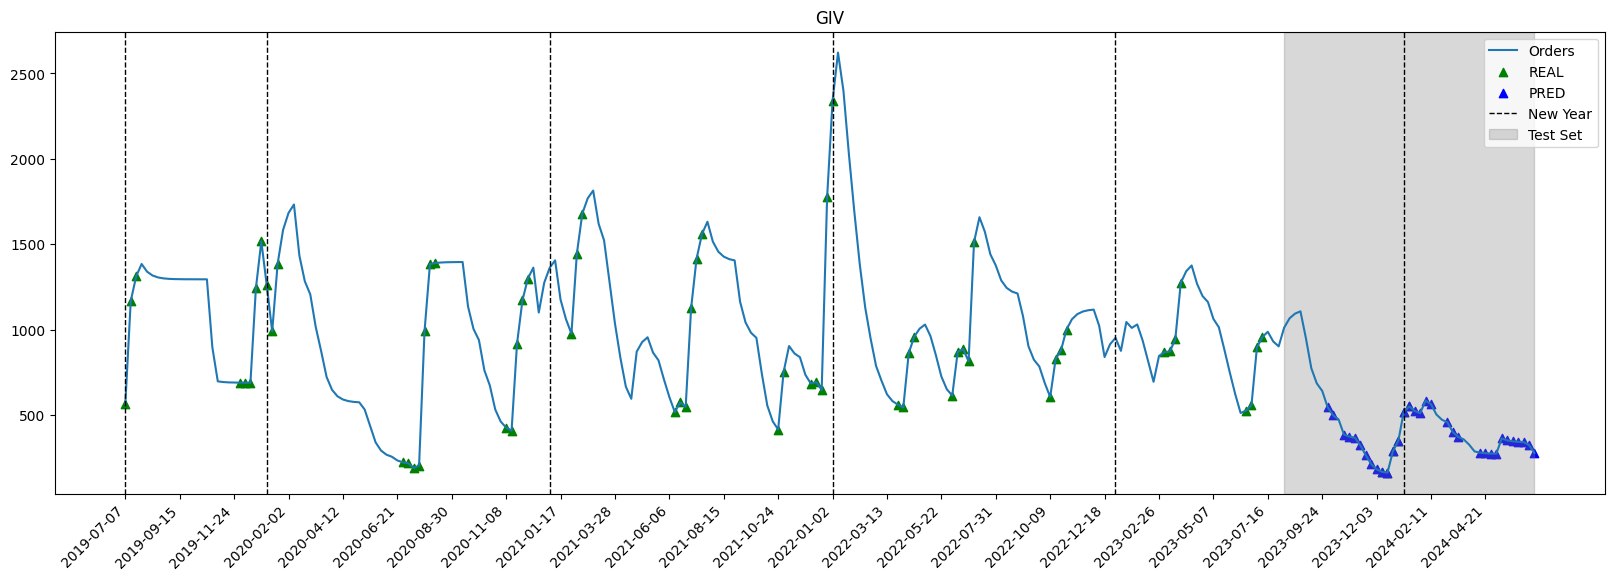

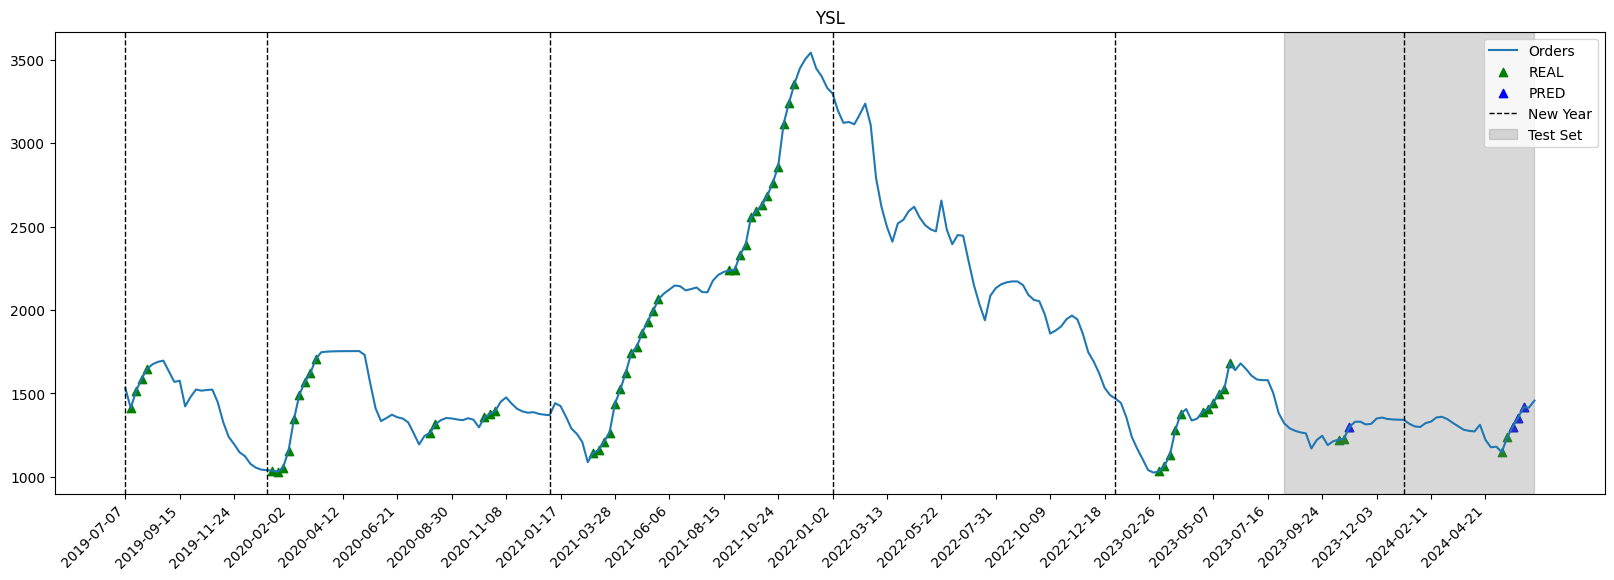

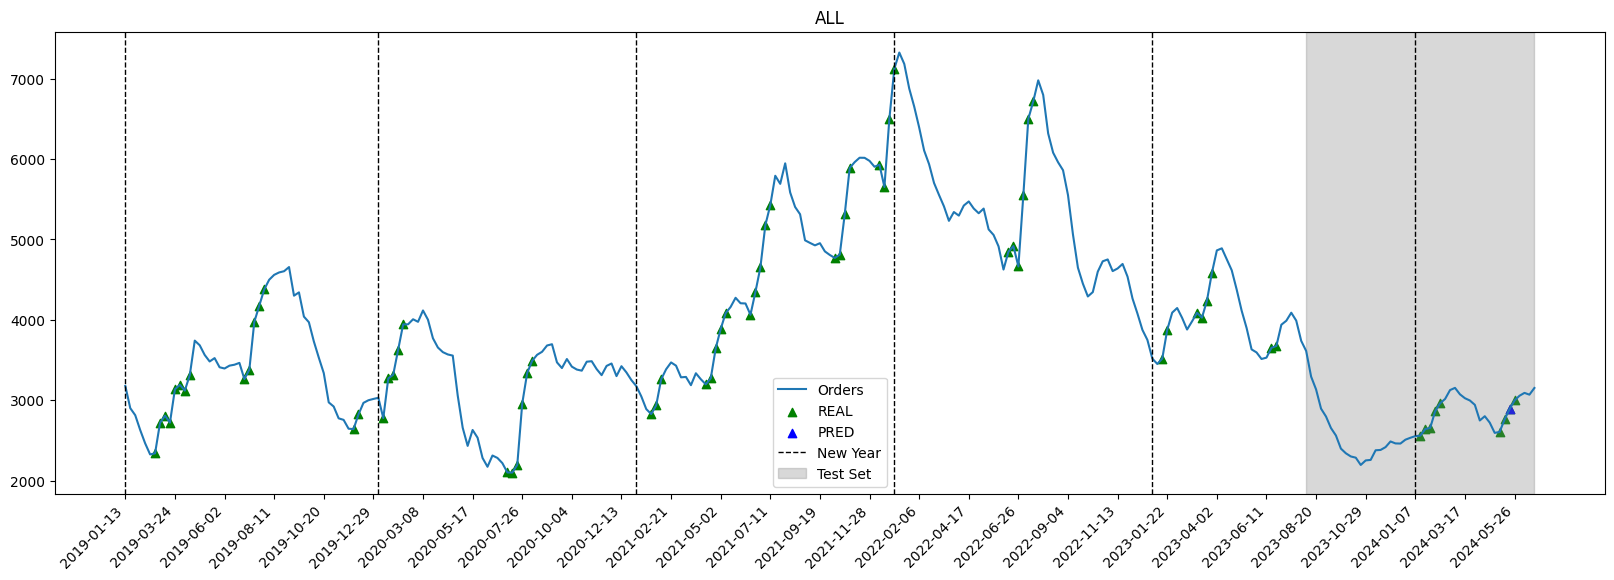

In [76]:
for brand in perimeter:
    df = pd.read_csv(f'{brand[0]}.csv', index_col='date')
    df = df.join(brand[1], how='left')
    df['date'] = df.index
    df['year'] = pd.to_datetime(df['date']).apply(lambda x : x.year)

    plt.figure(figsize=(20,6))
    plt.plot(df.index, df['qty-0'], label='Orders')
    plt.scatter(df.index[df['month_variation'] == 1], df['qty-0'][df['month_variation'] == 1], color='green', label='REAL', marker='^', alpha=1)
    plt.scatter(df.index[df['pred'] == 1], df['qty-0'][df['pred'] == 1], color='blue', label='PRED', marker='^', alpha=1)

    for year in df['year'].unique():
        plt.axvline(df[df['year'] == year].index[0], color='black', linestyle='--', lw=1, label='New Year' if year == df['year'].min() else "")

    plt.axvspan(test_index[0], test_index[-1], color='grey', alpha=0.3, label='Test Set')

    xticks = df.index[::10]  # Show every nth label
    plt.xticks(xticks, rotation=45, ha='right')

    plt.xticks(rotation=45, ha='right')

    plt.title(brand[0])

    plt.legend()
    plt.show()